# Trabajo Práctico N° 4

# **Iris**

# 1. Buscar dataset en la web 🔽

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


url ='https://raw.githubusercontent.com/Vikpezoa/Dataset-Iris-/main/Iris.csv'
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Explicar de cada set sus diferentes variables 🔽

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# 3. Decide de qué tipo de variable se trata. Justifique su respuesta. 🔽


* Id: La Id es un número identficador (único) de la planta y una variable discreta.
* Sepal Lenght (cm): El largo del sépalo de la planta es una variable contínua medida en centímetros.
* Sepal Width (cm): El ancho del sépalo de la planta es una variable contínua medida en centímetros.
* Petal Lenght (cm): El largo del pétalo de la planta es una variable contínua medida en centímetros.
* Petal Widht (cm): El ancho del pétalo de la planta es una variable contínua medida en centímetros.
* Species (cm): La especie de flor Iris es una variable categórica.

In [ ]:
#CElda agregada
#Eliminamos columna Id. Esta columna no es importante para las actividades siguientes(matriz de correlación)
df.drop('Id', axis=1, inplace=True)

# 4. Detectar y arreglar los siguientes conceptos 🔽
# * Valores ausentes
# * Valores atípicos

In [ ]:
# Valores ausentes:

va = df.isnull().sum()
print('Valores ausentes: ', va)
# No detectamos valores ausentes en este dataset ya que no obtuvimos ningún dato True en el DataFrame, siendo todos 0 (no nulos)


Valores ausentes:  SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# Valores atípicos:

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


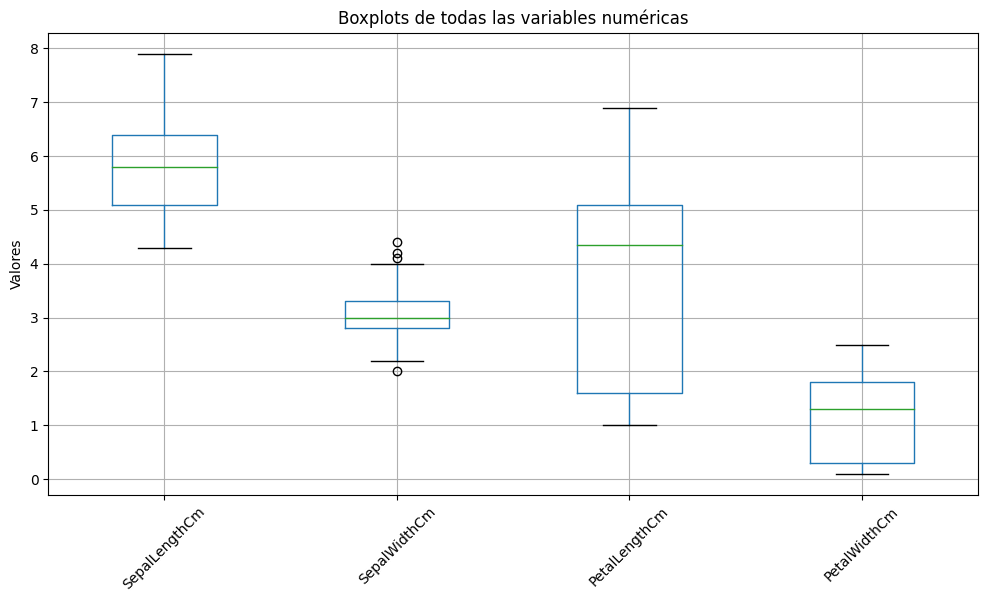

In [ ]:
# Extraer las columnas numéricas para el boxplot
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_numericas = df[columnas_numericas]

# Crear un boxplot de todas las columnas numéricas en el DataFrame utilizando Matplotlib
plt.figure(figsize=(12, 6))  # Tamaño de la figura
data_numericas.boxplot()
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.title('Boxplots de todas las variables numéricas')
plt.ylabel('Valores')
plt.show()


In [ ]:
# Con ayuda del grafico Box plot se puede observar que presenta valores atípicos la variable SepalWidhCm
# Lista de nombres de columnas en tu DataFrame


print("Old Shape: ", df.shape)

Q1 = np.percentile(df['SepalWidthCm'], 25, method='midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, method='midpoint')
IQR = Q3 - Q1

# Filtrar valores atípicos usando la condición booleana
upper = df['SepalWidthCm'] >= (Q3 + 1.5 * IQR)
print(np.where(upper))
lower = df['SepalWidthCm'] <= (Q1 - 1.5 * IQR)
print(np.where(lower))

# Filtrar y obtener índices de filas para eliminar
outlier_indices = df[upper | lower].index

# Eliminar filas basadas en los índices de valores atípicos
df.drop(outlier_indices, inplace=True)

print("New Shape: ", df.shape)

Old Shape:  (146, 5)
(array([], dtype=int64),)
(array([], dtype=int64),)
New Shape:  (146, 5)


<Axes: >

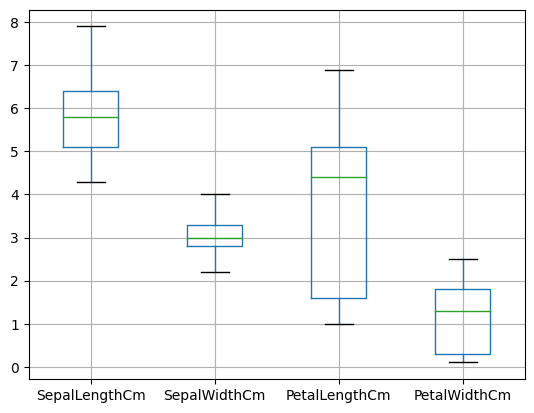

In [ ]:
df.boxplot()

# 5. De los diferentes data set, se puede eliminar alguna columna 🔽


Como se menciono al inicio, eliminamos la columna Id, las demás columnas son necesarias.

# 6. Realizar análisis univariados 🔽


# *   Gráfico de Frecuencias
# *   Gráfico de Histogramas
# *   Gráfico de Torta




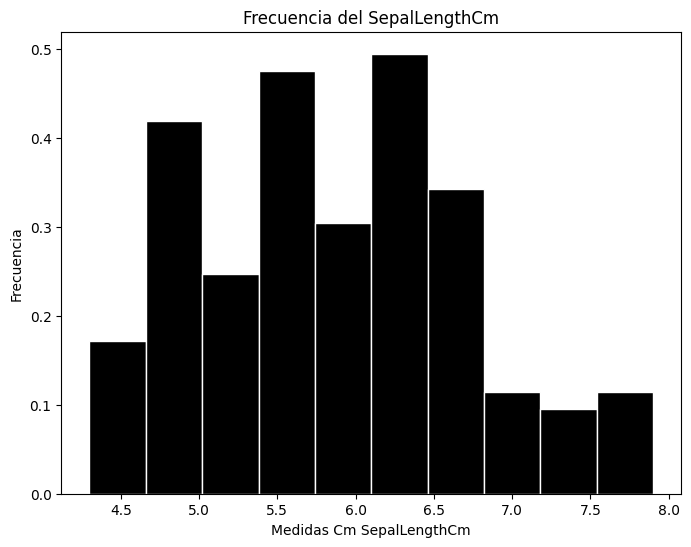

In [ ]:
# GRAFICO DE HISTOGRAMA:  con valores continuos (en intervalos)

# Grafico
plt.figure(figsize=(8, 6))
plt.hist(df["SepalLengthCm"], bins=10, density=True, color='#000000', edgecolor='white')
plt.title('Frecuencia del SepalLengthCm')
plt.xlabel('Medidas en Cm SepalLengthCm')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['SepalLengthCm'].describe()

count    146.000000
mean       5.856849
std        0.834093
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

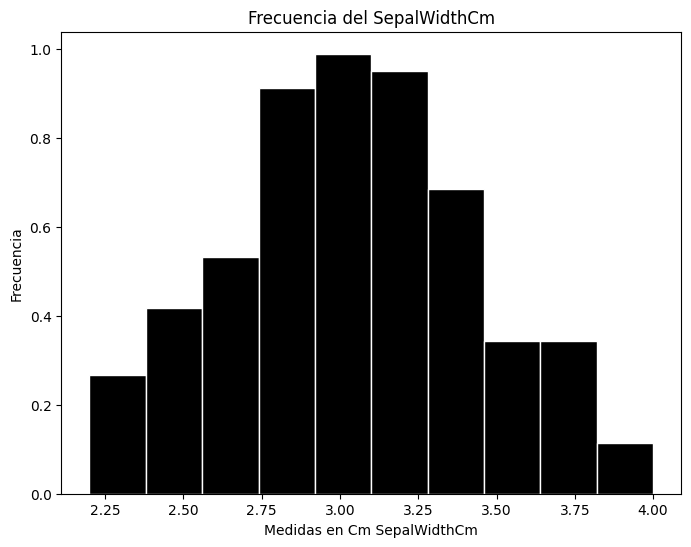

In [ ]:
# GRAFICO DE HISTOGRAMA:  con valores continuos (en intervalos)

# Grafico
plt.figure(figsize=(8, 6))
plt.hist(df["SepalWidthCm"], bins=10, density=True, color='#000000', edgecolor='white')
plt.title('Frecuencia del SepalWidthCm')
plt.xlabel('Medidas en Cm SepalWidthCm')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['SepalWidthCm'].describe()

count    146.000000
mean       3.036986
std        0.395145
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: SepalWidthCm, dtype: float64

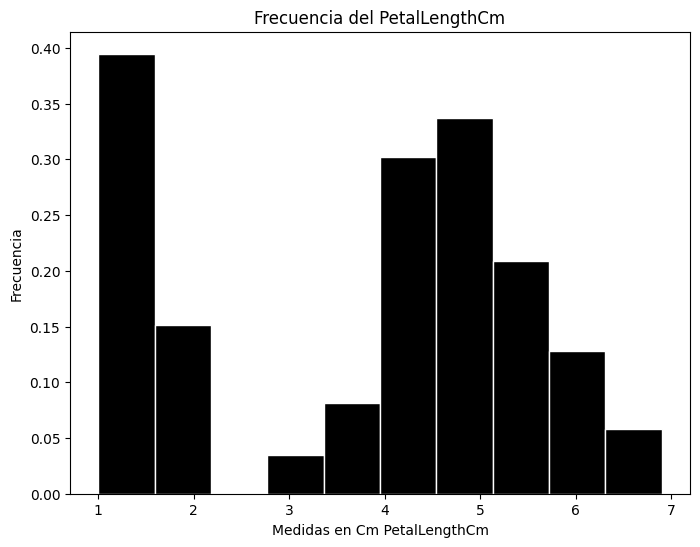

In [ ]:
# GRAFICO DE HISTOGRAMA:  con valores continuos (en intervalos)

# Grafico
plt.figure(figsize=(8, 6))
plt.hist(df["PetalLengthCm"], bins=10, density=True, color='#000000', edgecolor='white')
plt.title('Frecuencia del PetalLengthCm')
plt.xlabel('Medidas en Cm PetalLengthCm')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['PetalLengthCm'].describe()

count    146.000000
mean       3.807534
std        1.757117
min        1.000000
25%        1.600000
50%        4.400000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

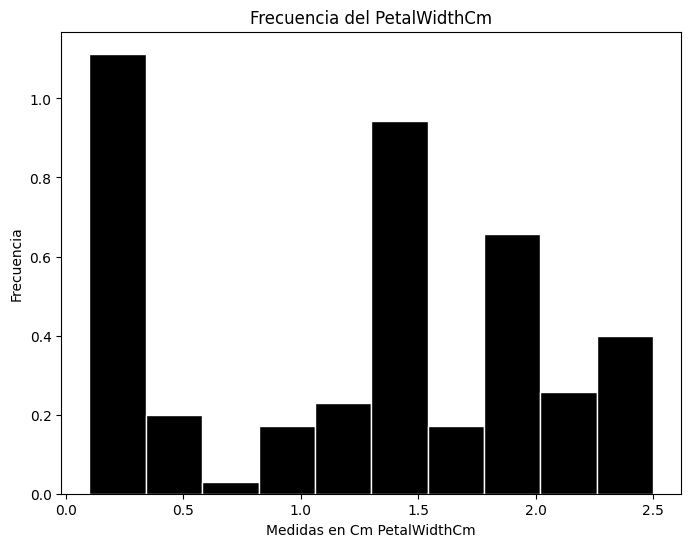

In [ ]:
# GRAFICO DE HISTOGRAMA:  con valores continuos (en intervalos)

# Grafico
plt.figure(figsize=(8, 6))
plt.hist(df["PetalWidthCm"], bins=10, density=True, color='#000000', edgecolor='white')
plt.title('Frecuencia del PetalWidthCm')
plt.xlabel('Medidas en Cm PetalWidthCm')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['PetalWidthCm'].describe()

count    146.000000
mean       1.219863
std        0.760365
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

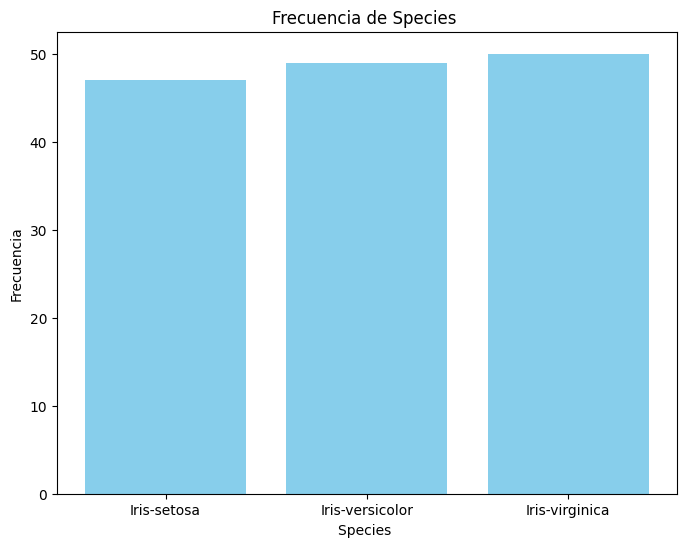

In [ ]:
# GRAFICO DE FRECUENCIA

array_aux = np.array(df['Species'])

# Obtener las cantidades únicas y sus conteos
valores_unicos, conteo = np.unique(array_aux, return_counts=True)

# Crear el gráfico de barras utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(valores_unicos, conteo,color='skyblue')
plt.title('Frecuencia de Species ')
plt.xlabel('Species ')
plt.ylabel('Frecuencia')
plt.xticks(valores_unicos)
plt.show()

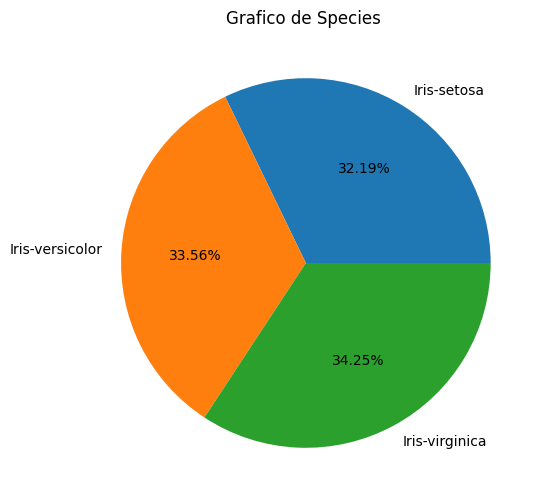

In [ ]:
array_auxv1 = np.array(df['Species'])

# Obtener las valores únicos y sus conteos
valores_unicos, conteo = np.unique(array_auxv1, return_counts=True)

# Crear el diagrama de torta utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(conteo, labels=valores_unicos, autopct='%1.2f%%')
plt.title('Grafico de Species ')
plt.show()

# 7. En base a los gráficos del punto 6 realizar distintas conclusiones 🔽



*  Entre 1 cm, 3 cm y 6 cm es donde mayor frecuencia de encuentran los petalos.
*   Es muy parejo encontrar con frecuencia las 3 especies enumeradas.




# 8. Realizar análisis de correlación y explicar que variables estan correlacionadas 🔽

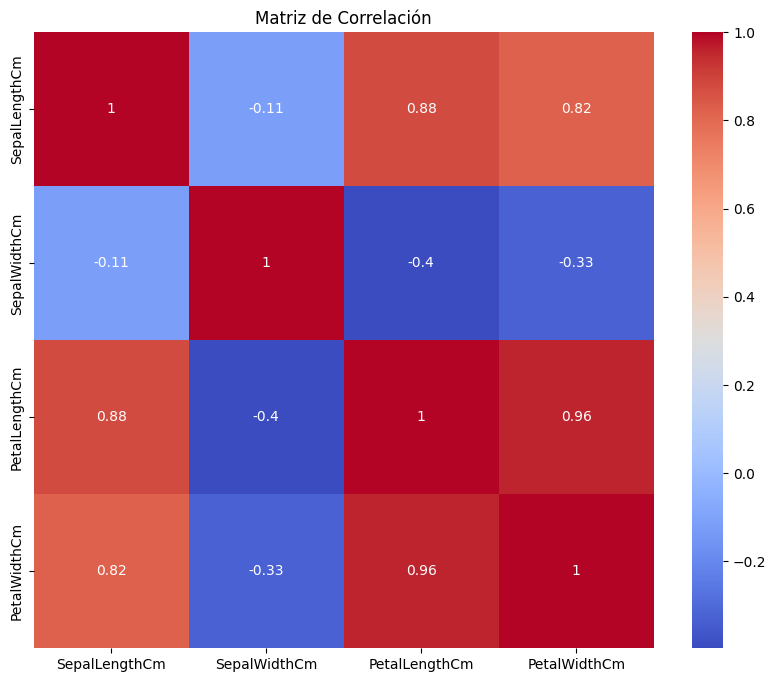

In [ ]:
correlation = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observando la grafica de la matriz la variable PetalLenghCm presenta una fuerte correlación positiva de 0.96 con la variable PetalWidthCm. Y no así la variable SepalWidhCm con respecto a la variable PetalWidthCm que fue un valor mínimo de 0.33 esto indica que esta variable no es un facto predictivo fuerte.

La correlación entre la variable SepalLengthCm con la variable PetalWidthCm,que fue de 0.82 y la variable PetalLengthCm que fue de 0.88 también presentan una fuerte correlación positiva.

## 9. Realizar un análisis de gráfico de chernoff y detectar outlires 🔽

In [ ]:
!pip install ChernoffFace